In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# Cargar los datos
data = pd.read_csv('archivo_filtrado.csv')

# Seleccionar las columnas relevantes para el clustering
columns = ['EDADHOM', 'EDADMUJ', 'GETHOM', 'GETMUJ', 'OCUHOM', 'OCUMUJ', 'CLAUNI']

# Filtrar los datos y eliminar las filas con valores faltantes
filtered_data = data[columns].dropna()


C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

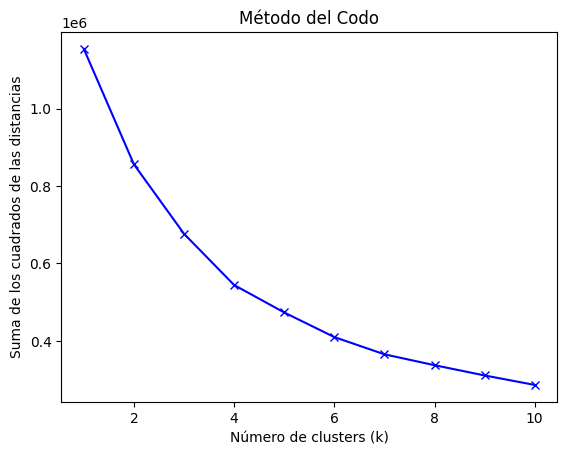

In [3]:
# Escalar los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Calcular la suma de los cuadrados de las distancias para diferentes valores de k
inertia = []
k_values = range(1, 11)  # Rango de valores de k a probar

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graficar la curva de la suma de los cuadrados de las distancias
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de los cuadrados de las distancias')
plt.title('Método del Codo')
plt.show()

In [41]:
# Calcular el promedio de las edades
filtered_data['EDAD_PROMEDIO'] = (filtered_data['EDADHOM'] + filtered_data['EDADMUJ']) / 2
# Calcular el promedio de las edades
filtered_data['GET_PROMEDIO'] = (filtered_data['GETHOM'] + filtered_data['GETMUJ']) / 2

# Eliminar las columnas 'EDADHOM' y 'EDADMUJ'
filtered_data = filtered_data.drop(['EDADHOM', 'EDADMUJ' , 'GETHOM', 'GETMUJ'], axis=1)

# Escalar los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)


C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


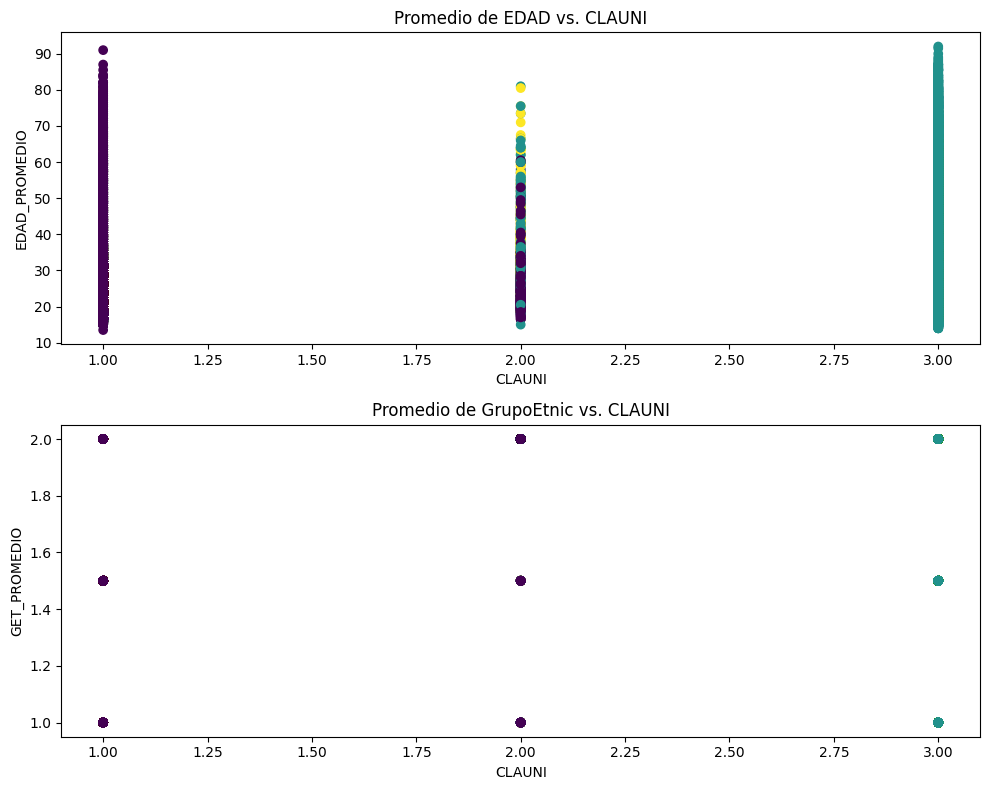

In [44]:
# Aplicar el algoritmo k-means
k = 3  # Número de clusters deseado
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Obtener las etiquetas de los clusters y asignarlas a los datos filtrados
cluster_labels = kmeans.labels_
filtered_data['Cluster'] = cluster_labels

# Evaluar la calidad de los grupos
silhouette_score = metrics.silhouette_score(scaled_data, cluster_labels)
sse = kmeans.inertia_

print("Coeficiente de silueta:", silhouette_score)
print("Suma de las distancias al cuadrado intra-cluster (SSE):", sse)

# Crear una figura con subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Subplot 1: Promedio de GETHOM vs. CLAUNI
axes[0].scatter(filtered_data['CLAUNI'], filtered_data['EDAD_PROMEDIO'], c=cluster_labels)
axes[0].set_xlabel('CLAUNI')
axes[0].set_ylabel('EDAD_PROMEDIO')
axes[0].set_title('Promedio de EDAD vs. CLAUNI')

# Subplot 2: Promedio de GETMUJ vs. CLAUNI
axes[1].scatter(filtered_data['CLAUNI'], filtered_data['GET_PROMEDIO'], c=cluster_labels)
axes[1].set_xlabel('CLAUNI')
axes[1].set_ylabel('GET_PROMEDIO')
axes[1].set_title('Promedio de GrupoEtnic vs. CLAUNI')

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar la figura con los subplots
plt.show()